In [3]:
from pypdf import PdfReader
reader = PdfReader("Gadsby.pdf")
f = open("Gadsby.txt", "w")
f.write("Gadsby by Ernest Vincent Wright\n")
for page in reader.pages[4:]: 
    f.write(page.extract_text())
f.close()  
    

In [4]:
import csv
file = open("Gadsby.txt", "r")
writer = csv.writer(open("Gadsby.csv", "w"))
for line in file:
    writer.writerow([line])
file.close()

In [5]:
import pandas as pd
df = pd.read_csv("Gadsby.csv", header=None)

In [6]:
df.head()

,0
0,Gadsby by Ernest Vincent Wright\n
1,I [To July 1906]\n
2,"If youth, throughout all history, had had a ch..."
3,"world that a child can think; and, possibly, d..."
4,across folks today who claim that “a child don...


In [7]:
df.drop(df.index[0], inplace=True)

In [8]:
df.reset_index(drop=True, inplace=True)

In [9]:
df

,0
0,I [To July 1906]\n
1,"If youth, throughout all history, had had a ch..."
2,"world that a child can think; and, possibly, d..."
3,across folks today who claim that “a child don...
4,"functioning at birth; and has, amongst its man..."
...,...
3452,Lady Gadsby didn’t; but Lady Gadsby was a woma...
3453,"Hills’ First Church, woman, as a branch of Man..."
3454,brought a dig in His honor’s ribs:— “it’s Norm...
3455,"Pastor Brown, standing at that big church door..."


In [10]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/rabi/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /home/rabi/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/rabi/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /home/rabi/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/rabi/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package ave

True

In [11]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
text_list=df.iloc[1:].values.tolist()
tokenized_words = []
for line in text_list:
    tokenized_words.extend(word_tokenize(line[0]))
print("Tokenized words:", tokenized_words)


Tokenized words: ['If', 'youth', ',', 'throughout', 'all', 'history', ',', 'had', 'had', 'a', 'champion', 'to', 'stand', 'up', 'for', 'it', ';', 'to', 'show', 'a', 'doubting', 'world', 'that', 'a', 'child', 'can', 'think', ';', 'and', ',', 'possibly', ',', 'do', 'it', 'practically', ';', 'you', 'wouldn', '’', 't', 'constantly', 'run', 'across', 'folks', 'today', 'who', 'claim', 'that', '“', 'a', 'child', 'don', '’', 't', 'know', 'anything.', '”', 'A', 'child', '’', 's', 'brain', 'starts', 'functioning', 'at', 'birth', ';', 'and', 'has', ',', 'amongst', 'its', 'many', 'infant', 'convolutions', ',', 'thousands', 'of', 'dormant', 'atoms', ',', 'into', 'which', 'God', 'has', 'put', 'a', 'mystic', 'possibility', 'for', 'noticing', 'an', 'adult', '’', 's', 'act', ',', 'and', 'figuring', 'out', 'its', 'purport', '.', 'Up', 'to', 'about', 'its', 'primary', 'school', 'days', 'a', 'child', 'thinks', ',', 'naturally', ',', 'only', 'of', 'play', '.', 'But', 'many', 'a', 'form', 'of', 'play', 'cont

In [13]:
len(tokenized_words)
print("Number of words found in Gadsby:", len(tokenized_words))


Number of words found in Gadsby: 62851


In [14]:
import collections
word_counts = collections.Counter(tokenized_words)


In [15]:
import string
print("Count for each letter appearing individually in the text")
for i in string.ascii_lowercase:
    if i in word_counts:
        print(f'{i}: {word_counts[i]}')
    else:
        print(f'{i}: 0')


Count for each letter appearing individually in the text
a: 2289
b: 0
c: 0
d: 10
e: 0
f: 0
g: 0
h: 0
i: 0
j: 0
k: 0
l: 0
m: 22
n: 0
o: 10
p: 0
q: 0
r: 0
s: 531
t: 320
u: 0
v: 0
w: 0
x: 0
y: 0
z: 0


In [16]:
list_of_common_words=['i', 'a', 'to', 'and', 'of', 'in', 'that', 'it', 'is', 'was', 'he', 'she', 'they', 'you', 'this', 'for', 'on', 'with', 'as', 'by','at', 'an', 'be', 'not', 'or', 'but', 'from', 'which', 'all', 'there', 'we', 'so', 'if', 'what', 'who', 'about', 'this','these','those','them','him','her','us','my','your','our','his','its','their','ourself','yourself','herself','himself','itself','themselves','each','every','any','some','one','two','three','four','five','six','seven','eight','nine','ten']
common_word_count={}
for i in list_of_common_words:
    if i in word_counts:
        common_word_count[i] = word_counts[i]
common_word_count_df = pd.DataFrame.from_dict(common_word_count, orient='index', columns=['count'])
common_word_count_df.reset_index(inplace=True)
common_word_count_df.columns = ['word', 'count']
common_word_count_df.sort_values(by='count', ascending=False, inplace=True)
common_word_count_df.head()

,word,count
0,a,2289
2,and,1422
3,of,1140
5,that,1114
1,to,893


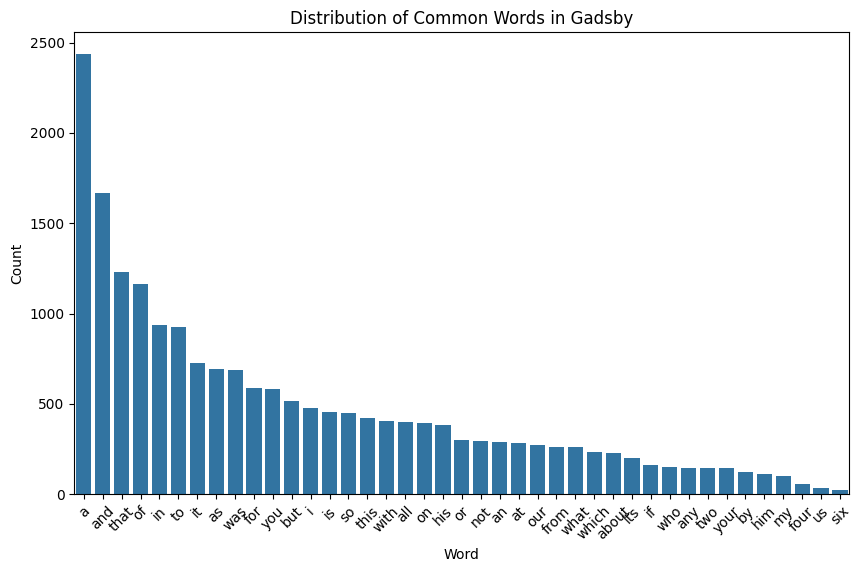

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='count', data=common_word_count_df)
plt.title('Distribution of Common Words in Gadsby')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [17]:
from nltk import FreqDist

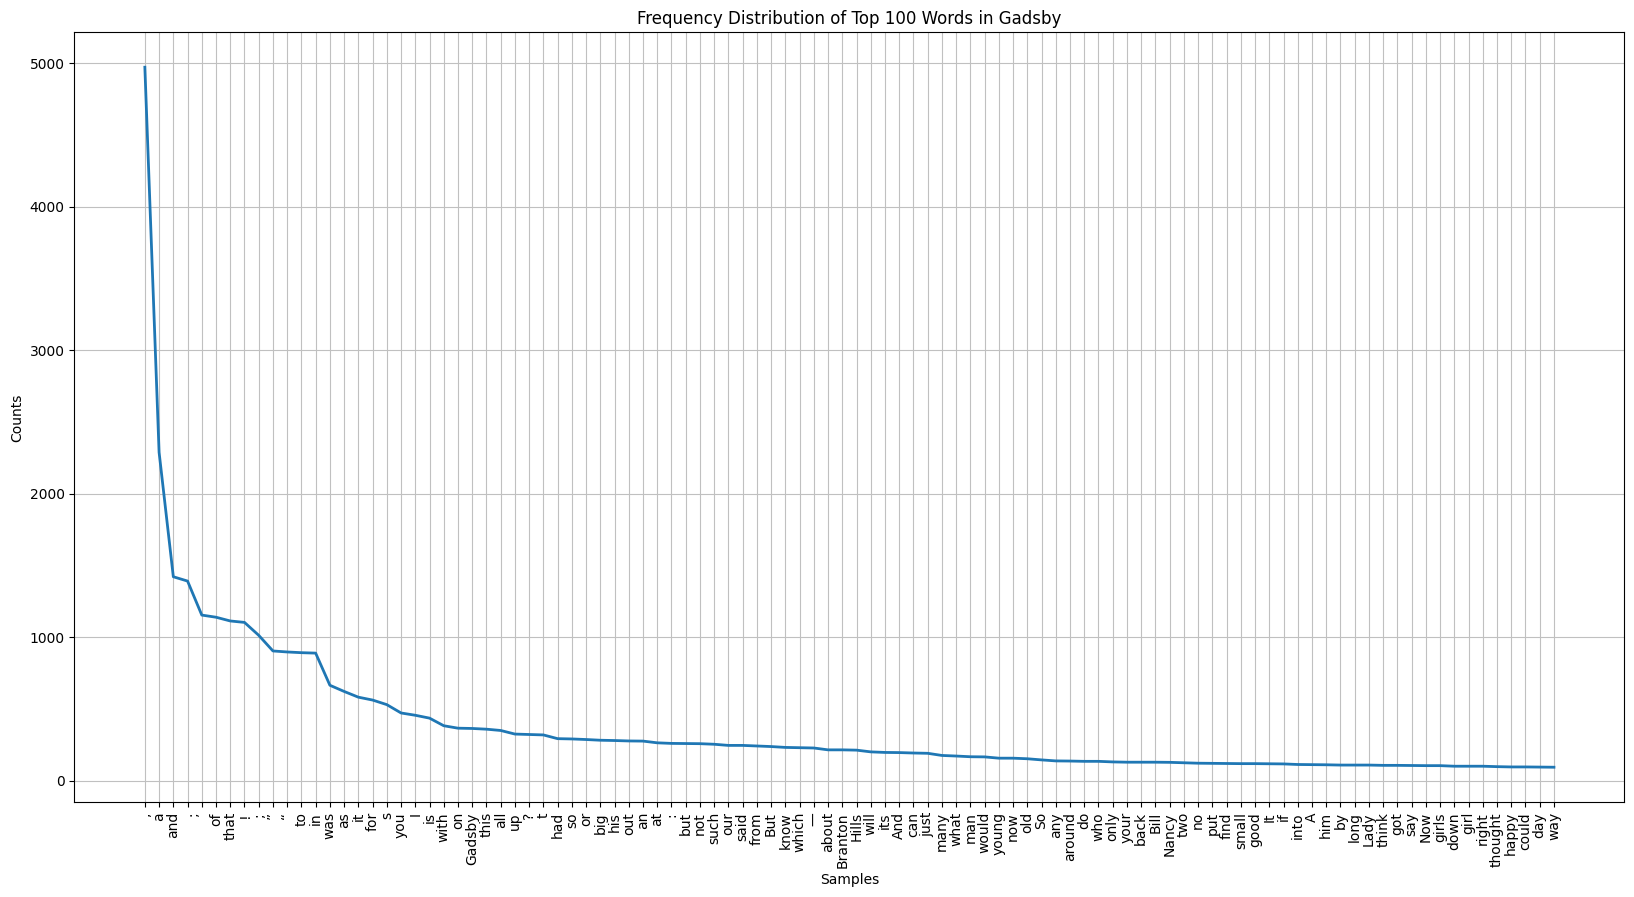

In [18]:
fdist = FreqDist(tokenized_words)
plt.figure(figsize=(20, 10))
fdist.plot(100, cumulative=False)
plt.title("Frequency Distribution of Top 100 Words in Gadsby")
plt.show()


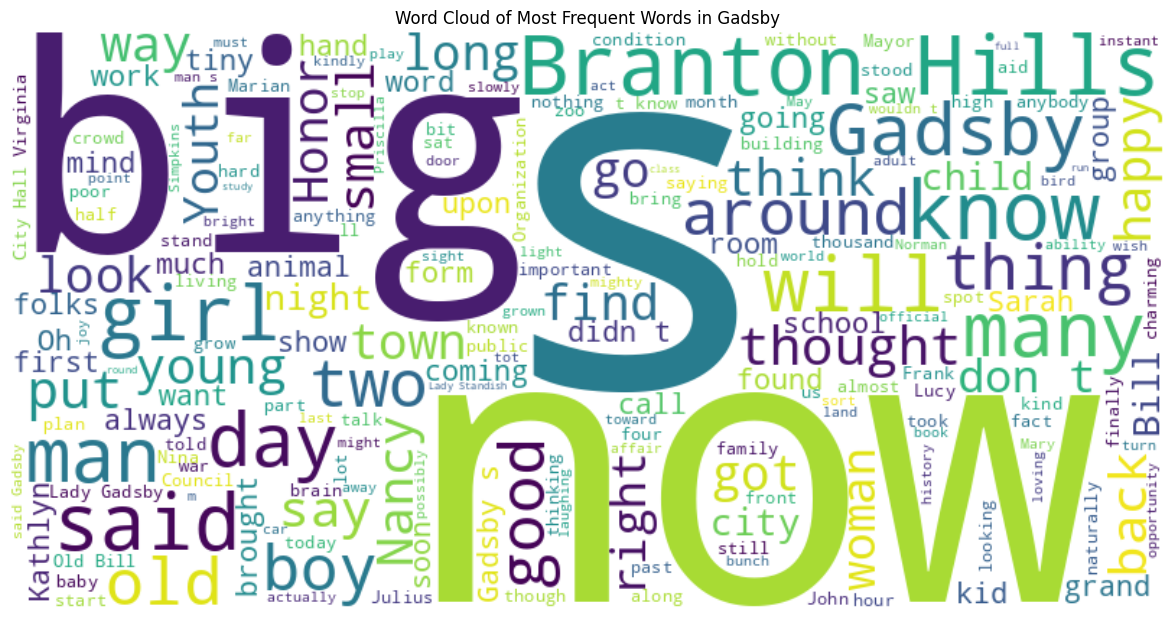

In [19]:
# ...existing code...

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all words into a single string
text = ' '.join(tokenized_words)

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Frequent Words in Gadsby")
plt.show()

# ...existing code...